# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import sys
sys.path.append('starter_code/to/api_keys')

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [27]:
# cities=cities[:5]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | la orilla
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | hunza
City not found. Skipping...
Processing Record 5 of Set 1 | jumla
Processing Record 6 of Set 1 | porto novo
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | pontes e lacerda
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | leshukonskoye
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | padang
Processing Record 22

Processing Record 39 of Set 4 | kushima
Processing Record 40 of Set 4 | moree
Processing Record 41 of Set 4 | sistranda
Processing Record 42 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 4 | ulladulla
Processing Record 44 of Set 4 | port arthur
Processing Record 45 of Set 4 | florianopolis
Processing Record 46 of Set 4 | nizhniy tsasuchey
Processing Record 47 of Set 4 | novo aripuana
Processing Record 48 of Set 4 | mezen
Processing Record 49 of Set 4 | kahului
Processing Record 0 of Set 5 | kidal
Processing Record 1 of Set 5 | garissa
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | mogadishu
Processing Record 4 of Set 5 | garmsar
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | san carlos
Processing Record 7 of Set 5 | dunmore town
Processing Record 8 of Set 5 | saint-pierre
Processing Record 9 of Set 5 | baheri
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11 

City not found. Skipping...
Processing Record 29 of Set 8 | berlevag
Processing Record 30 of Set 8 | cap malheureux
Processing Record 31 of Set 8 | dharchula
Processing Record 32 of Set 8 | adre
Processing Record 33 of Set 8 | hvide sande
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | aguililla
Processing Record 36 of Set 8 | sukhumi
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | kirakira
Processing Record 39 of Set 8 | imeni poliny osipenko
Processing Record 40 of Set 8 | guanica
Processing Record 41 of Set 8 | abu kamal
Processing Record 42 of Set 8 | changji
Processing Record 43 of Set 8 | burica
City not found. Skipping...
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | ust-omchug
Processing Record 46 of Set 8 | vao
Processing Record 47 of Set 8 | san andres
Processing Record 48 of Set 8 | dolores
Processing Record 49 of Set 8 | diego de almagro
Processing Record 0 of Set 9 | chengde
Processing Record 1 of Set 9 |

Processing Record 13 of Set 12 | skibbereen
Processing Record 14 of Set 12 | umea
Processing Record 15 of Set 12 | aki
Processing Record 16 of Set 12 | smithers
Processing Record 17 of Set 12 | gusinoye ozero
Processing Record 18 of Set 12 | amasia
Processing Record 19 of Set 12 | mangrol
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | cozumel
Processing Record 22 of Set 12 | ballinrobe
Processing Record 23 of Set 12 | havre
Processing Record 24 of Set 12 | doaba
Processing Record 25 of Set 12 | jinka
Processing Record 26 of Set 12 | kintinku
Processing Record 27 of Set 12 | bolshaya murta
City not found. Skipping...
Processing Record 28 of Set 12 | sabang
Processing Record 29 of Set 12 | molinella
Processing Record 30 of Set 12 | pokhara
Processing Record 31 of Set 12 | pangody
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | bezhanitsy
Processing Record 34 of Set 12 | viseu
Processing Record 35 of Set 12 | hvolsvollur
Processing 

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,283.21,57,75,18.01,CL,1679515427
1,la orilla,17.9833,-102.2333,302.94,51,0,4.69,MX,1679515429
2,chokurdakh,70.6333,147.9167,240.17,97,88,2.70,RU,1679515429
3,jumla,29.2747,82.1838,279.39,76,67,1.00,NP,1679515385
4,porto novo,6.4965,2.6036,300.05,72,34,3.22,BJ,1679515430


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,283.21,57,75,18.01,CL,1679515427
1,la orilla,17.9833,-102.2333,302.94,51,0,4.69,MX,1679515429
2,chokurdakh,70.6333,147.9167,240.17,97,88,2.70,RU,1679515429
3,jumla,29.2747,82.1838,279.39,76,67,1.00,NP,1679515385
4,porto novo,6.4965,2.6036,300.05,72,34,3.22,BJ,1679515430


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

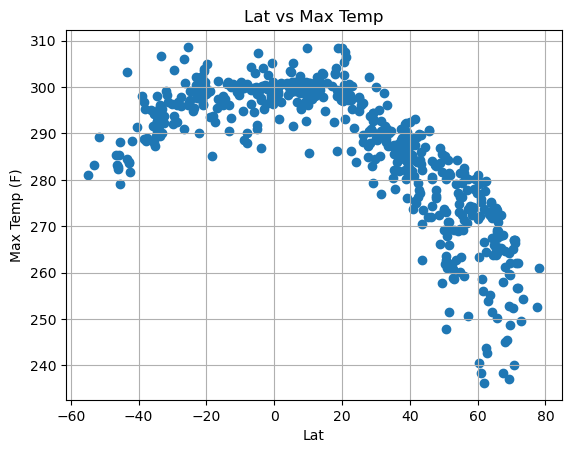

In [36]:
# Build scatter plot for latitude vs. temperature
endRunDate = city_data_df["Date"].max()


#set data to plot
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Lat vs Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

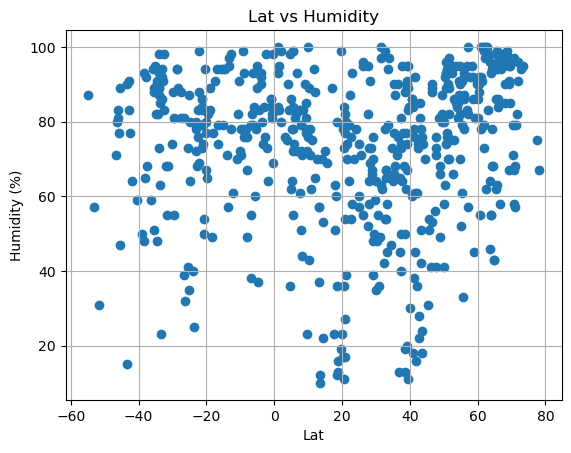

<Figure size 640x480 with 0 Axes>

In [38]:
# Build the scatter plots for latitude vs. humidity
h = city_data_df["Humidity"]
plt.scatter(x,h)
plt.title(f"Lat vs Humidity")
plt.grid()
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity.png')
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

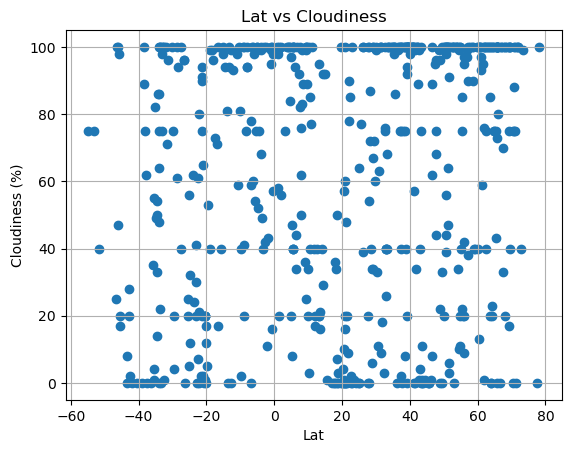

In [41]:
# Build the scatter plots for latitude vs. cloudiness
c = city_data_df["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Lat vs Cloudiness")
plt.grid()
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness.png')
plt.show

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

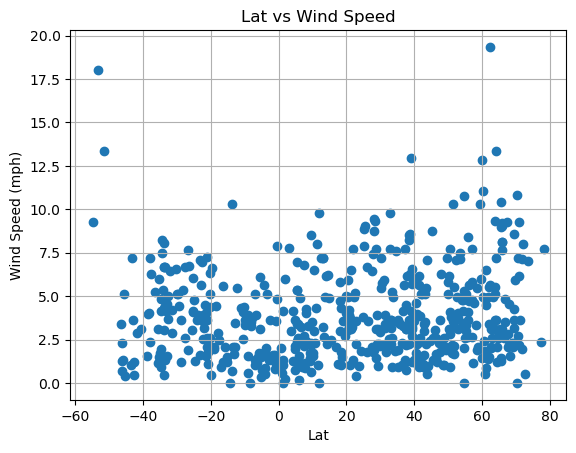

<Figure size 640x480 with 0 Axes>

In [45]:
# Build the scatter plots for latitude vs. wind speed
ws = city_data_df["Wind Speed"]
plt.scatter(x,ws)
plt.title(f"Lat vs Wind Speed")
plt.grid()
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'../output_data/Lat vs Wind Speed.png')
plt.show()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Lat')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,la orilla,17.9833,-102.2333,302.94,51,0,4.69,MX,1679515429
2,chokurdakh,70.6333,147.9167,240.17,97,88,2.70,RU,1679515429
3,jumla,29.2747,82.1838,279.39,76,67,1.00,NP,1679515385
4,porto novo,6.4965,2.6036,300.05,72,34,3.22,BJ,1679515430
5,jamestown,42.0970,-79.2353,283.92,61,100,5.14,US,1679515430


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,283.21,57,75,18.01,CL,1679515427
6,pontes e lacerda,-15.2261,-59.3353,298.14,94,100,1.20,BR,1679515431
7,mataura,-46.1927,168.8643,282.72,83,100,0.69,NZ,1679514898
10,cape town,-33.9258,18.4232,294.38,73,0,8.05,ZA,1679515168
12,east london,-33.0153,27.9116,295.24,86,100,4.26,ZA,1679515432


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8640010810967661
y = -0.66x + 308.16


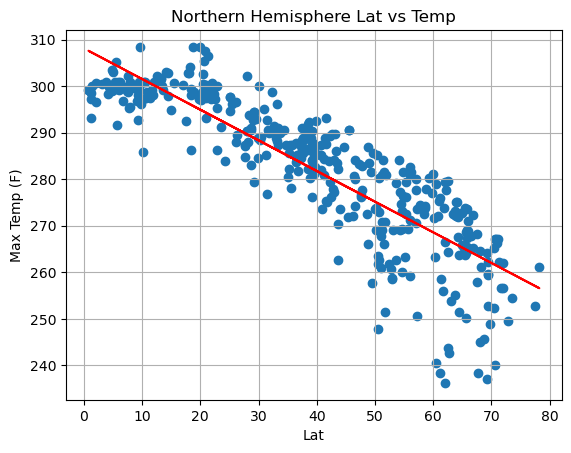

In [53]:
# Linear regression on Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp (F)"
#give the title
plt.title(f'Northern Hemisphere Lat vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Lat vs Temp.png')
plt.show()

The r-square is 0.5739595627510121
y = 0.24x + 301.27


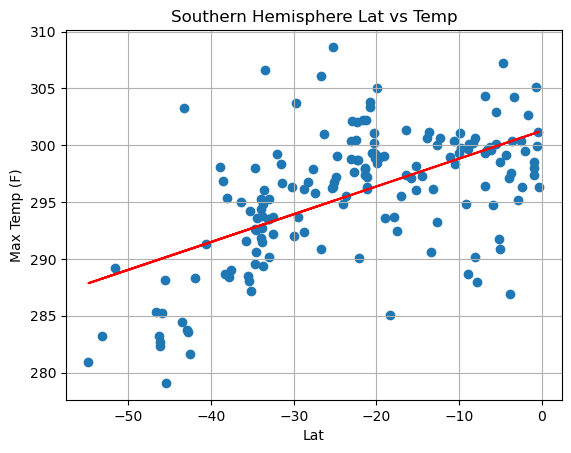

In [54]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regEQplotX = -25
regEQplotY = 40
y_label = "Max Temp (F)"
plt.title(f'Southern Hemisphere Lat vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

**Discussion about the linear relationship:** The scatter plot maps Northern and Southern cities' temperature against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.24128937790625768
y = 0.26x + 61.74


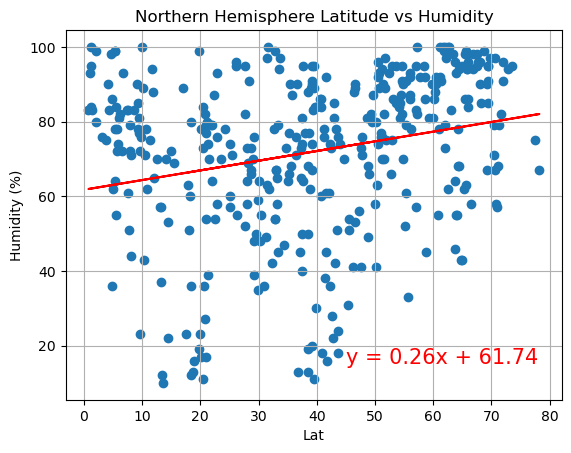

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

The r-square is 0.13492807994892508
y = 0.17x + 80.36


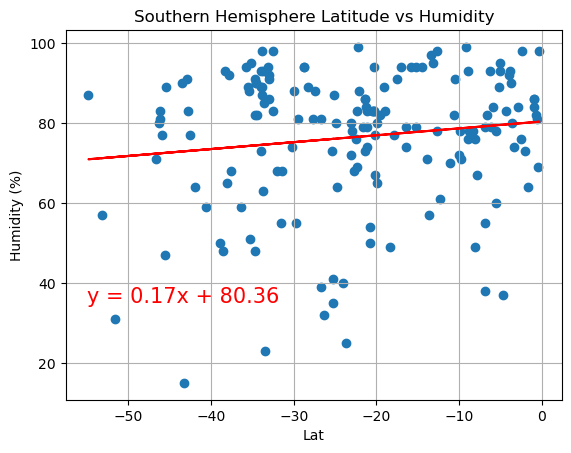

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

**Discussion about the linear relationship:** The scatter plot maps Northern and Southern cities' humidity against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.15856230953645156
y = 0.3x + 51.84


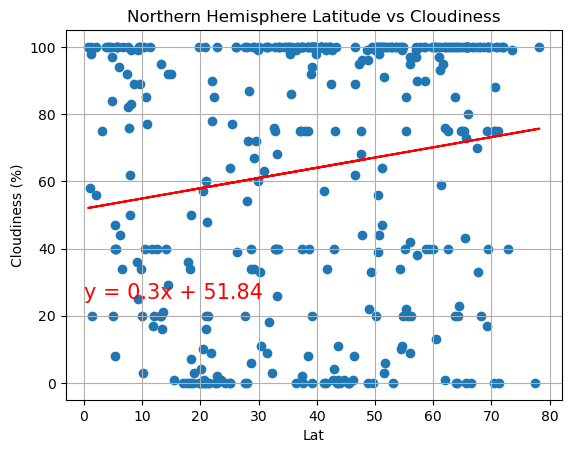

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()


The r-square is 0.2321011763027761
y = 0.65x + 70.54


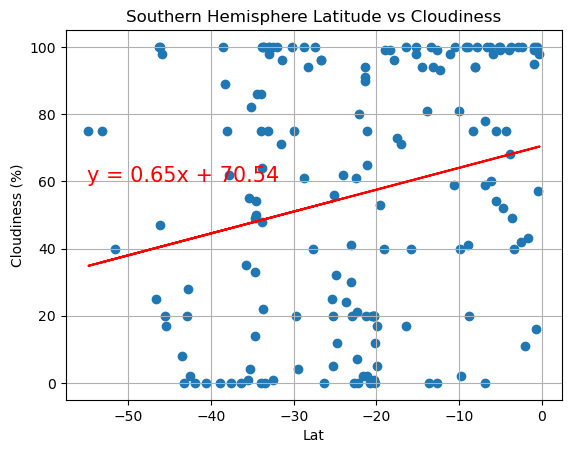

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

**Discussion about the linear relationship:** The scatter plot maps Northern and Southern cities' cloudiness against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.172686058756437
y = 0.02x + 3.1


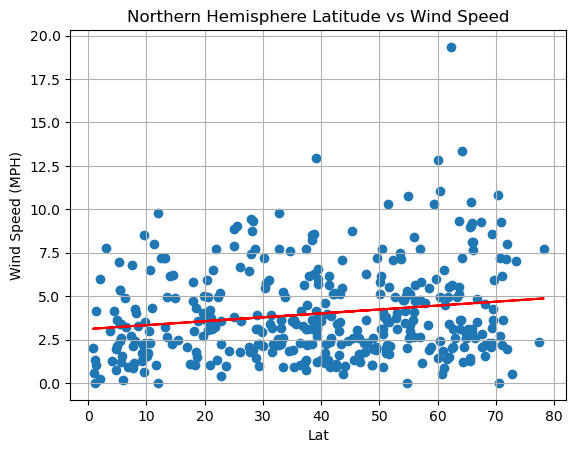

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

The r-square is -0.3137745847789732
y = -0.06x + 2.21


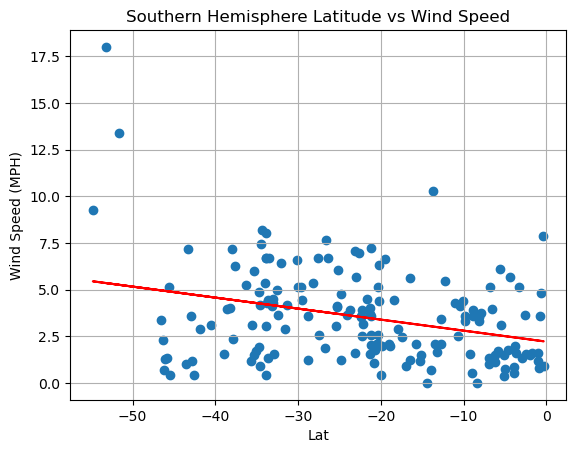

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()

**Discussion about the linear relationship:** The scatter plot maps Northern and Southern cities' wind speed against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and wind speed.